### ARIMA

- **Here we will create a model to predict how the Average temperature is going to change with time**

In [1]:
# To use ARIMA model we need to first install it

!pip install pmdarima

In [2]:
# importing libraries

import pandas as pd
import numpy as np

#### Loading the dataset

In [3]:
# Making the date column as index column
# 'parse_dates=True' so pandas understand it is dealing with dates value else it will treat it as normal strings

df = pd.read_csv("data/days_temp.csv", index_col='DATE', parse_dates=True)
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


In [4]:
# Checking information

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2014-01-01 to 2018-12-30
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MinTemp  1821 non-null   float64
 1   MaxTemp  1821 non-null   float64
 2   AvgTemp  1821 non-null   float64
 3   Sunrise  1825 non-null   int64  
 4   Sunset   1825 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 85.5 KB


In [5]:
# Dropping the rows with null values

df = df.dropna()
print("Shape of the dataset is", df.shape)

Shape of the dataset is (1821, 5)


#### Plotting our Data

<AxesSubplot: xlabel='DATE'>

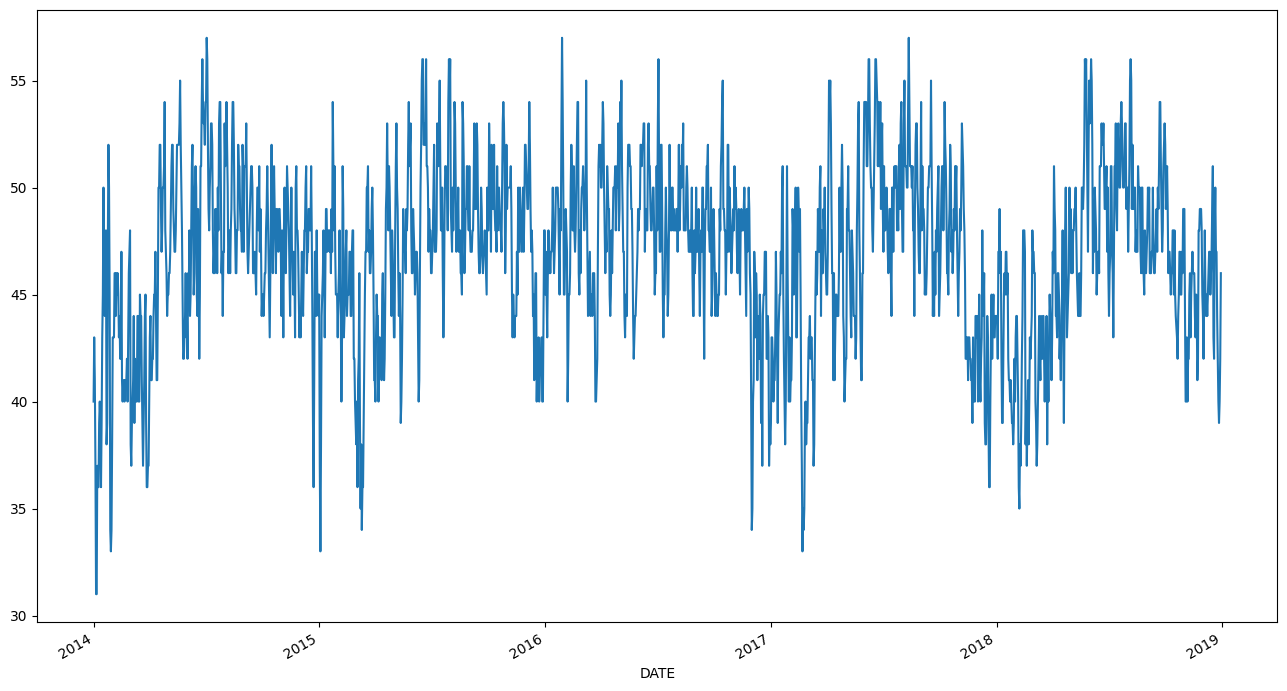

In [6]:
df['AvgTemp'].plot(figsize=(16,9))

**Notes**

- The data looks `stationary`.

#### Checking stationarity using statistical tests

In [7]:
# Doing Augment Dickey Fuller test

from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [8]:
adf_test(df['AvgTemp'])

1. ADF :  -6.554680125068785
2. P-Value :  8.675937480199322e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


**Notes:**

- As here we can see the `P-value` is very small, so the data is `stationary`.

#### Figure Out `Order` for `ARIMA` Model

In [9]:
# Here we use the auto_arima from the pmdarima 

from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Here we need to pass the dataset of which we want the 'order'
# The 'trace=True' so it will print each step during iteration
# Here for each order it will create an 'AIC' value
# The goal is to minimize the 'AIC'

stepwise_fit = auto_arima(df['AvgTemp'], trace=True, suppress_warnings=True)           
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.610, Time=2.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=1.51 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=1.60 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.221, Time=2.14 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.212, Time=2.16 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.189, Time=1.88 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.657, Time=2.43 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.393, Time=2.63 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.462, Time=2.75 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.577, Time=2.79 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.134
Date:                Mon, 16 Jan 2023   AIC                           8294.268
Time:                        12:28:27   BIC                           8338.325
Sample:                             0   HQIC                          8310.522
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1617      0.352      3.296      0.001       0.471       1.852
ar.L1          0.9751      0.008    128.504      0.000       0.960       0.990
ma.L1         -0.1285      0.024     -5.448      0.000      -0.175      -0.082
ma.L2         -0.2208      0.024     -9.194      0.000      -0.268      -0.174
ma.L3         -0.2032      0.024     -8.523      0.000      -0.250      -0.156
ma.L4         -0.1377      0.023     -6.055      0.000      -0.182      -0.093
ma.L5         -0.0510      0.024     -2.092      0.036      -0.099      -0.003
sigma2         5.4988      0.172     31.947      0.000       5.161       5.836
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                19.95
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- Here it shows `SARIMAX` which is `ARIMA` with `seasonality`.

#### Now we will train the model with best parameters

In [11]:
# importing the ARIMA model

from statsmodels.tsa.arima_model import ARIMA

In [12]:
# Spliting the data into train and test
# Here we are reserving the last 30 values as test dataset

print(df.shape)
train = df.iloc[:-30]
test = df.iloc[-30:]
print(train.shape, test.shape)

(1821, 5)
(1791, 5) (30, 5)


In [13]:
# training the model with best order i.e. (1,0,5)
model = ARIMA(train['AvgTemp'], order=(1,0,5))
model = model.fit()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


- As we can see the error, so we need to import the library as follows

In [14]:
from statsmodels.tsa.arima.model import ARIMA

In [15]:
# now again training the model with best order i.e. (1,0,5)

model = ARIMA(train['AvgTemp'], order=(1,0,5))
model = model.fit()

In [16]:
# Checking the model summary

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Mon, 16 Jan 2023   AIC                           8156.395
Time:                        12:38:33   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Make Predictions on Test Set

In [17]:
# to make predictions we will need to use 'model.predict()'
# here we need to provide the starting index and the ending index

start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start=start, end=end, typ='levels')
print(pred)

1791    44.754109
1792    44.987795
1793    45.388741
1794    45.721546
1795    45.863733
1796    45.874127
1797    45.884370
1798    45.894467
1799    45.904418
1800    45.914225
1801    45.923892
1802    45.933419
1803    45.942809
1804    45.952064
1805    45.961186
1806    45.970176
1807    45.979037
1808    45.987770
1809    45.996378
1810    46.004861
1811    46.013223
1812    46.021464
1813    46.029586
1814    46.037592
1815    46.045482
1816    46.053259
1817    46.060923
1818    46.068478
1819    46.075923
1820    46.083261
Name: predicted_mean, dtype: float64


- As we can see it is not using the date values instead providing the numbered index, but we need the date value for plotting
- So we need to use the following command:
  - `pred.index = df.index[start:end+1]`
  
- We can also do the following to get the index of prediction:
  - `index_future_dates = pd.date_range(start='2018-12-01',end='2018-12-30')`
  - `pred.index = index_future_dates`
  
- Here we first creating a range of dates and then using it as index.

In [23]:
# Now checking again

start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start=start, end=end, typ='levels')
pred.index = df.index[start:end+1]
print(pred)

DATE
2018-12-01    44.754109
2018-12-02    44.987795
2018-12-03    45.388741
2018-12-04    45.721546
2018-12-05    45.863733
2018-12-06    45.874127
2018-12-07    45.884370
2018-12-08    45.894467
2018-12-09    45.904418
2018-12-10    45.914225
2018-12-11    45.923892
2018-12-12    45.933419
2018-12-13    45.942809
2018-12-14    45.952064
2018-12-15    45.961186
2018-12-16    45.970176
2018-12-17    45.979037
2018-12-18    45.987770
2018-12-19    45.996378
2018-12-20    46.004861
2018-12-21    46.013223
2018-12-22    46.021464
2018-12-23    46.029586
2018-12-24    46.037592
2018-12-25    46.045482
2018-12-26    46.053259
2018-12-27    46.060923
2018-12-28    46.068478
2018-12-29    46.075923
2018-12-30    46.083261
Name: predicted_mean, dtype: float64


<AxesSubplot: xlabel='DATE'>

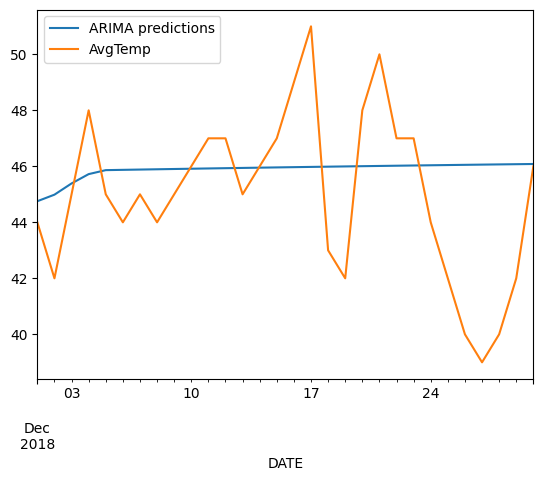

In [21]:
# Creating plots

start=len(train)
end=len(train)+len(test)-1
index_future_dates = pd.date_range(start='2018-12-01',end='2018-12-30')
pred = model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.index = index_future_dates
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

<AxesSubplot: xlabel='DATE'>

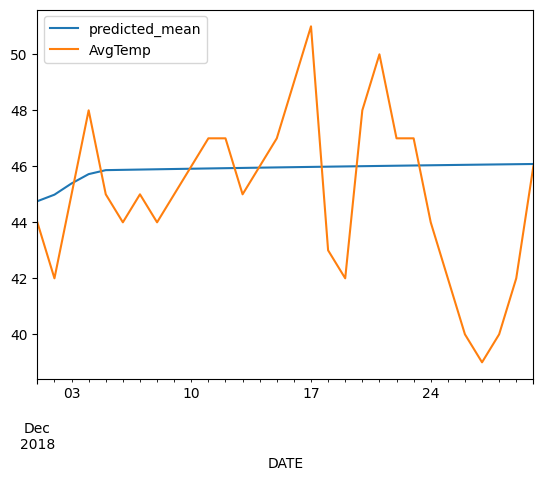

In [24]:
# Creating plots along with the test set to see the comparison

pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [22]:
# Checking the mean value

test['AvgTemp'].mean()

45.0

In [26]:
# Calculating mean squared error between prediction and the test values

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

3.0004640041287756


**Notes:**

- As here the average is `45` and the `root mean squared error` is `3` so it is acceptable.
- If the `root mean squared error` is almost same as `average` then it becomes a bad model.

#### Now predicting for future dates

In [27]:
# Here first train the model using the entire dataset

model2 = ARIMA(df['AvgTemp'], order=(1,0,5))
model2 = model2.fit()
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


In [29]:
# Doing predictions for next 30 days

index_future_dates = pd.date_range(start='2018-12-30', end='2019-01-29')
pred = model2.predict(start=len(df), end=len(df)+30, typ='levels').rename('ARIMA Predictions')
pred.index = index_future_dates
print(pred)

2018-12-30    46.418166
2018-12-31    46.113912
2019-01-01    45.617874
2019-01-02    45.249566
2019-01-03    45.116915
2019-01-04    45.136666
2019-01-05    45.156140
2019-01-06    45.175341
2019-01-07    45.194274
2019-01-08    45.212942
2019-01-09    45.231349
2019-01-10    45.249498
2019-01-11    45.267393
2019-01-12    45.285038
2019-01-13    45.302436
2019-01-14    45.319590
2019-01-15    45.336505
2019-01-16    45.353183
2019-01-17    45.369627
2019-01-18    45.385842
2019-01-19    45.401829
2019-01-20    45.417593
2019-01-21    45.433136
2019-01-22    45.448462
2019-01-23    45.463573
2019-01-24    45.478473
2019-01-25    45.493164
2019-01-26    45.507650
2019-01-27    45.521933
2019-01-28    45.536017
2019-01-29    45.549903
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot: >

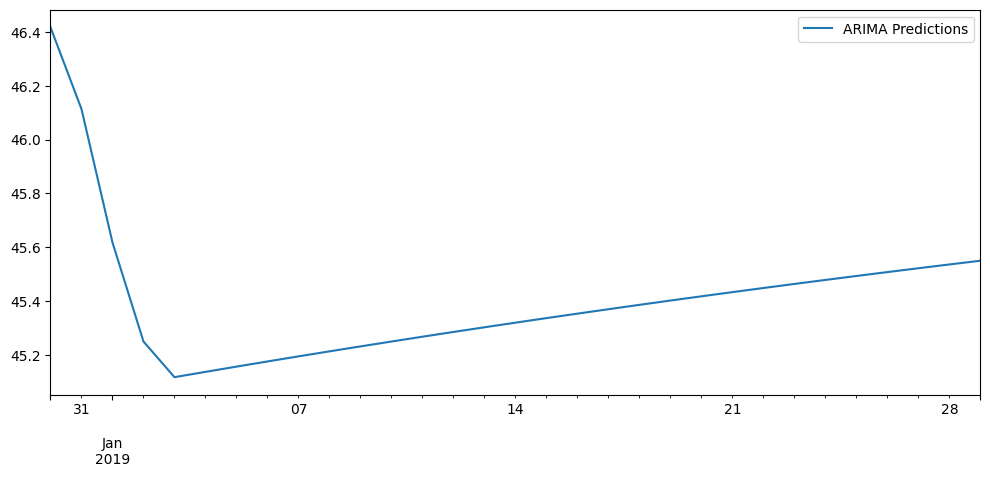

In [30]:
# Creating plot


pred.plot(figsize=(12,5),legend=True)